# Simple 3-layer multi-class neural network for multi-class classification
+ Network architecture: number of neurons at layer 1, layer 2, output = (4, 5, 3)
+ Activation functions employed at layer 1, layer 2 and output are ReLu, sigmoid, and softmax, respectively.
+ In addition to adding another layer, the ReLu activation function is adopted at layer 1 instead of sigmoid funtion.
+ ReLu tends to prevent the weights not to be drastically reduced as the number of layers grows. 
+ By expermentation, it can be shown that the optimization depends on the learning rate.
+ For example, the learning rate of 0.7 does not lead to the optimization. This leads to the development of more efficient
+ optimization technique such as moment, ADAM, RMSprop, etc. These techniques try to adjust the learning rate in accordance with
+ specific property of features of input data.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl

eta = 0.9 # learning rate
epoch = 20000

### ReLu Activation Function
+ ReLu activation function and its derivative are defined.
+ ReLU stands for rectified linear unit, and is a type of activation function. Mathematically, it is defined as 
+ y = max(0, + x). Visually, it looks like the following: ReLU is the most commonly used activation function in neural 
+ networks, especially in CNNs. The rectified linear activation function overcomes the vanishing gradient problem, 
+ allowing models to learn faster and perform better.

In [2]:
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_deriv(x):
    return x * (1.0 - x)

def softmax(x):
    # softmax   
    e = np.exp(x - np.max(x))    # x-m is used to avoid overflow of exponent function
    return e / np.sum(e, axis=0) # add in column

def relu(x):
    return np.maximum(0, x)

def relu_deriv(z):
    return (z > 0).astype(float)

### 3-layer Neural Network Model with Softmax Function
+ Softmax function is used at outputs of layer 3.
+ ReLu is used for layer 1 activation function, sigmoid for layer 2, and finally softmax for layer 3, i.e., output layer.

In [3]:
class neuralnetwork:
    # neural network model
    
    def __init__(self, x, w1, w2, w3, y):
        self.inputs   = x.T
        self.target  = y.T        # target
        self.weights1 = w1        # weights at layer 1
        self.weights2 = w2        # weights at layer 2
        self.weights3 = w3        # weights at output layer
        self.b1 = np.zeros((4,1)) # bias at layer 1 
        self.b2 = np.zeros((5,1)) # bias at layer 2 
        self.b3 = np.zeros((3,1)) # bias at output layer   
        self.layer1  = np.zeros((4, self.inputs.shape[1])) # output at layer 1
        self.layer2  = np.zeros((5, self.inputs.shape[1])) # output at layer 2
        self.output   = np.zeros(self.target.shape) # output of output layer
    
    def forwardprop(self):
        # forward processing of inputs and weights using sigmoid activation function
        self.layer1 = relu(np.dot(self.weights1, self.inputs) + self.b1)
        self.layer2 = sigmoid(np.dot(self.weights2, self.layer1) + self.b2)
        self.output = softmax(np.dot(self.weights3, self.layer2) + self.b3)

    def backprop(self):
        # backward processing of appling the chain rule to find derivative of the loss function with respect to weights
        delta3 = (self.output - self.target) 
        delta2 = np.dot(self.weights3.T, delta3) * sigmoid_deriv(self.layer2)
        delta1 = np.dot(self.weights2.T, delta2) * relu_deriv(self.layer1)
        dw3 = np.dot(delta3, self.layer2.T)
        dw2 = np.dot(delta2, self.layer1.T)
        dw1 = np.dot(delta1, self.inputs.T)

        # update the weights with the derivative of the loss function   
        self.weights3 -= eta * dw3 / batchsize
        self.weights2 -= eta * dw2 / batchsize
        self.weights1 -= eta * dw1 / batchsize

        # update biases with the derivative of the loss function
        self.b3 -= eta * np.sum(delta3, axis = 1, keepdims=True) / batchsize # add in row axis, keeping column dimension
        self.b2 -= eta * np.sum(delta2, axis = 1, keepdims=True) / batchsize # add in row axis, keeping column dimension
        self.b1 -= eta * np.sum(delta1, axis = 1, keepdims=True) / batchsize # add in row axis, keeping column dimension

    def predict(self, x):
        # predict the output for a given input x
        self.layer1 = sigmoid(np.dot(self.weights1, x) + self.b1)
        self.layer2 = sigmoid(np.dot(self.weights2, self.layer1) + self.b2)
        self.output = softmax(np.dot(self.weights3, self.layer2) + self.b3)
        return (self.output)
        
     # calculate error
    def calculate_error(self):
        error = np.sum(-self.target * np.log(self.output)) # cross entropy loss function
        return error

### Data Set
+ The same data set as in layer-2 NN is used.
+ training_loss is defined here to store the error at each iteration of epoch.

In [4]:
if __name__ == "__main__":

    # get training data set
    samples = 10
    attributes = 2
    classes = 3
    
    np.random.seed(45)
    data1_set = np.random.randn(samples, attributes) + np.array([0, -3])  # red ball
    data2_set = np.random.randn(samples, attributes) + np.array([3,  3])  # green ball
    data3_set = np.random.randn(samples, attributes) + np.array([-3, 3])  # blue ball
   
    feature_set = np.vstack([data1_set, data2_set, data3_set])   
    labels = np.array([0]*samples + [1]*samples + [2]*samples)

    # Initializing colors and building a colormap
    cmap = mpl.colors.ListedColormap(['red', 'green', 'blue'])

    # display data training data set
    # plt.figure(figsize=(10,7)) 
#    plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap =cmap, s= 200, alpha=0.5)  
#    plt.show()

    one_hot_labels = np.zeros((samples*classes, classes))

    for i in range(samples*classes):  
        one_hot_labels[i, labels[i]] = 1

    inputdata = feature_set
    targetvalue = one_hot_labels
    batchsize = inputdata.shape[0]

    '''
    w1 = np.random.rand(4, inputdata.shape[1]) / np.sqrt(inputdata.shape[1]/2) # number of nueron nodes at a layer 1 layer is 4
    w2 = np.random.rand(5, 4) / np.sqrt(4/2)   # number of nueron nodes at a layer 1 layer is 5
    w3 = np.random.rand(3, 5) /  np.sqrt(5/2)  # number of output labels is 3
    '''

    w1 = np.random.rand(4, inputdata.shape[1]) # number of nueron nodes at a layer 1 layer is 4
    w2 = np.random.rand(5, 4)                  # number of nueron nodes at a layer 1 layer is 5
    w3 = np.random.rand(3, 5)                  # number of output labels is 3

    nn = neuralnetwork(inputdata, w1, w2, w3, targetvalue)

    training_loss = []

### Batch Gradient Descent Optimization
+ All the input data are processed in batch at both forward and backward propagations.
+ Batch GD optimizes more smoothly since the weights update are performed in batch
+ Loss graph can be shown.

target
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
output after training
[[9.99853898e-01 1.00325723e-04 4.57760500e-05]
 [9.99853898e-01 1.00325723e-04 4.57760500e-05]
 [9.99853898e-01 1.00325723e-04 4.57760500e-05]
 [9.99853898e-01 1.00325723e-04 4.57760500e-05]
 [9.99853898e-01 1.00325723e-04 4.57760500e-05]
 [9.99853898e-01 1.00325723e-04 4.57760500e-05]
 [9.99853898e-01 1.00325723e-04 4.57760500e-05]
 [9.99853898e-01 1.00325723e-04 4.57760500e-05]
 [9.99853898e-01 1.00325723e-04 4.57760500e-05]
 [9.99853898e-01 1.00325723e-04 4.57760500e-05]
 [4.73067716e-05 9.99910997e-01 4.16962677e-05]
 [3.77279693e-05 9.99919221e-01 4.30514334e-05]
 [3.87824792e-05 9.99915155e-01 4.

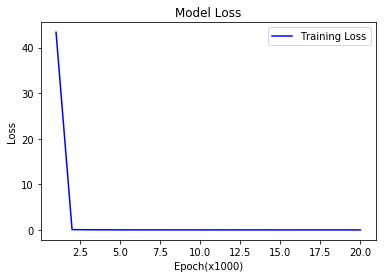

In [5]:
# training 
    for i in range(epoch):    
        nn.forwardprop()
        nn.backprop()
        if (i % 1000) == 0:
#            print("Error: ", nn.calculate_error())
            training_loss.append(nn.calculate_error())
            
    print("target")   
    print(targetvalue)
    print("output after training")   
    print(nn.output.T)

    # predicting and testing the output for a given input data
    # For a given input data [1, -1], it is predicated as red ball since the output is [0, 1, 0], i.e. the red ball.
    x_prediction = np.array([[1.0, -1.0]])
    predicted_output = nn.predict(x_prediction.T)
    print("Predicted data based on trained weights: ")
    print("Input: ", x_prediction)
    print("Output: ", predicted_output.T)

#    print(training_loss)
    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1)
    plt.title("Model Loss")
    plt.plot(epoch_count, training_loss, 'b-')
    plt.legend(['Training Loss'])
    plt.xlabel('Epoch(x1000)')
    plt.ylabel('Loss')
    plt.show()